## Lead Score Case Study
Logistic Regression Model to predict score between 0 to 100 which an be used by company as a potential target to convert

### Step 1: Importing and Merging Data

In [319]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [320]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [321]:
# Importing all datasets
leads = pd.read_csv(r"C:\Users\sagar\Studies\Jupyter Python Files\Lead Score Assignment\Lead Scoring Assignment\Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [322]:
# Let's see the head of our master dataset
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [323]:
# Let's check the dimensions of the dataframe
leads.shape

(9240, 37)

In [324]:
# let's look at the statistical aspects of the dataframe
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [325]:
# Let's see the type of each column
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 3: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [326]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [327]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [328]:

def assign_value(x):
    country_list = ['India','United States','United Arab Emirates','Singapore','Saudi Arabia','United Kingdom']
    if x in country_list:
        return x
    else:
        return 'Other'

leads['Country_new'] = leads['Country'].map(assign_value)

In [329]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Country_new
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified,Other
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened,India
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened,India
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified,India
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified,India


In [330]:
leads = leads.drop(['Country'], 1)

In [331]:
leads.shape

(9240, 37)

In [332]:
leads.info

<bound method DataFrame.info of                                Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
...                                    ...          ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                         API      Olark Chat             0            0   
1                         API  Organic Search             0            0   
2     Landing Page Submission  

In [333]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [334]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [335]:
# Checking the percentage of missing values
null_percentage = round(100*(leads.isnull().sum()/len(leads.index)), 2)
threshold = 15
selected_columns = leads.loc[:, null_percentage > threshold]
selected_columns

,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score
0,Select,Select,Unemployed,Better Career Prospects,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0
1,Select,Select,Unemployed,Better Career Prospects,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0
2,Business Administration,Select,Student,Better Career Prospects,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0
3,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0
4,Select,Other,Unemployed,Better Career Prospects,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9235,IT Projects Management,Select,Unemployed,Better Career Prospects,Will revert after reading the email,High in Relevance,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0
9236,Media and Advertising,Select,Unemployed,Better Career Prospects,wrong number given,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0
9237,Business Administration,Select,Unemployed,Better Career Prospects,invalid number,Not Sure,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0
9238,Human Resource Management,Online Search,NaN,NaN,NaN,NaN,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0


In [336]:
for col in selected_columns:
    leads[col].fillna(leads[col].mode()[0],inplace=True)

In [337]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Country_new
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified,Other
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened,India
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened,India
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified,India
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified,India


In [338]:
leads.shape

(9240, 37)

In [339]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [340]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Specialization                                   0.00
How did you hear about X Education               0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [341]:
column_numeric = ['TotalVisits','Page Views Per Visit']

In [342]:
for col in column_numeric:
    leads[col].fillna(leads[col].mean(),inplace=True)

In [343]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Country_new
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified,Other
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened,India
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened,India
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified,India
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified,India


In [344]:
leads.shape

(9240, 37)

In [345]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.00
Last Activity                                    1.11
Specialization                                   0.00
How did you hear about X Education               0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [346]:
column_missing_categoric = ['Lead Source','Last Activity']

In [347]:
for col in column_missing_categoric:
    leads[col].fillna(leads[col].mode()[0],inplace=True)

In [348]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Country_new
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified,Other
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened,India
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened,India
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified,India
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified,India


In [349]:
leads.shape

(9240, 37)

In [350]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

In [351]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

## We now have no missing value

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

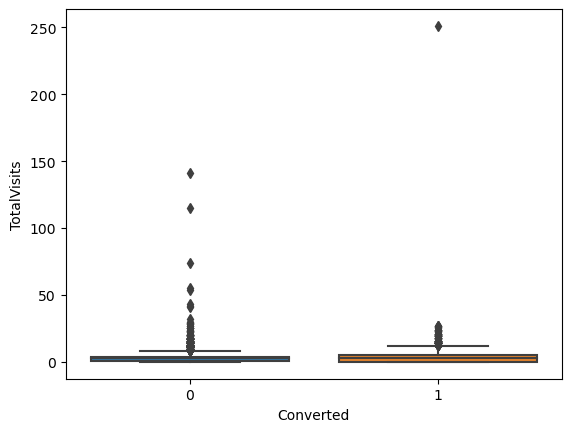

In [352]:
sns.boxplot(data = leads, x = "Converted", y = "TotalVisits")

## We have a few outliers... Imputing outliers to the 98 percentile value

In [353]:
leads["TotalVisits"].describe()

count    9240.000000
mean        3.445238
std         4.818723
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [354]:
percentile_98 = leads["TotalVisits"].quantile(0.98)
percentile_98

13.0

In [359]:
percentile_98 = leads["TotalVisits"].quantile(0.98)
percentile_98
leads["TotalVisits"] = leads["TotalVisits"].apply(lambda x: min (x,percentile_98))

In [360]:
leads["TotalVisits"].describe()

count    9240.000000
mean        3.276948
std         3.017222
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        13.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

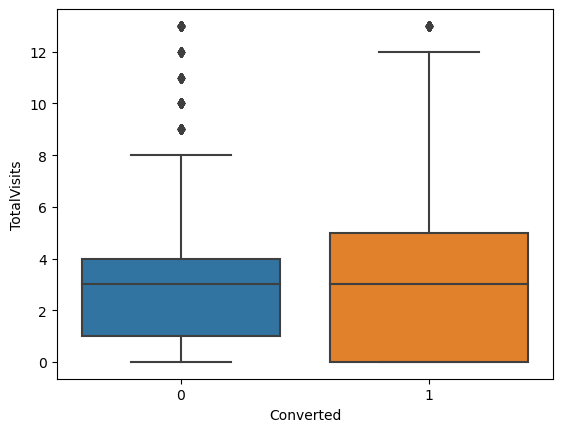

In [361]:
sns.boxplot(data = leads, x = "Converted", y = "TotalVisits")

In [362]:
leads["Total Time Spent on Website"].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

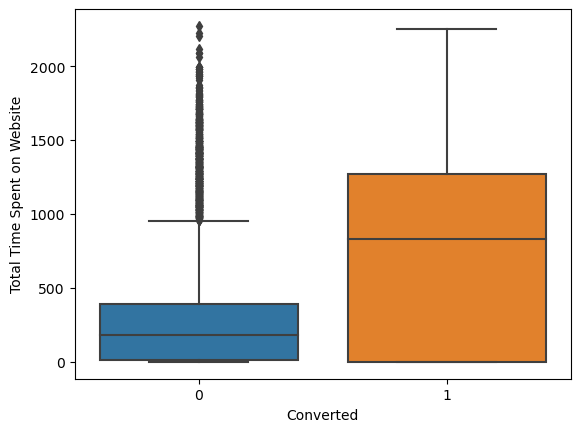

In [363]:
sns.boxplot(data = leads, x = "Converted", y = "Total Time Spent on Website")

In [364]:
leads["Page Views Per Visit"].describe()

count    9240.000000
mean        2.362820
std         2.145333
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

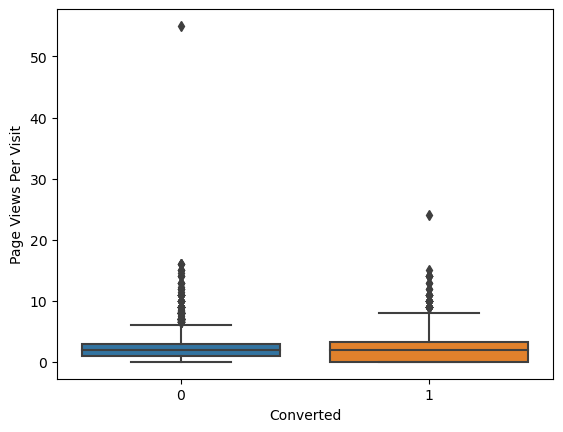

In [365]:
sns.boxplot(data = leads, x = "Converted", y = "Page Views Per Visit")

## We have a few outliers... Imputing outliers to the 98 percentile value

In [366]:
percentile_98 = leads["Page Views Per Visit"].quantile(0.98)
percentile_98

8.0

In [367]:
percentile_98 = leads["Page Views Per Visit"].quantile(0.98)
percentile_98
leads["Page Views Per Visit"] = leads["Page Views Per Visit"].apply(lambda x: min (x,percentile_98))

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

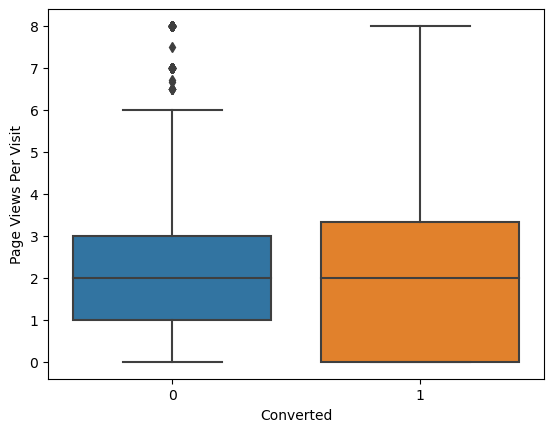

In [368]:
sns.boxplot(data = leads, x = "Converted", y = "Page Views Per Visit")

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [369]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Country_new','Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Tags','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)

In [370]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,1,0,0,0,0,0,0,0


#### Dropping the repeated variables

In [371]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Country_new','Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Tags','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Last Notable Activity'], 1)

In [372]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 161 entries, Prospect ID to Last Notable Activity_View in browser link Clicked
dtypes: float64(4), int64(17), object(1), uint8(139)
memory usage: 2.8+ MB


Now you can see that you have all variables as numeric.

#### Checking for Outliers

In [373]:
# Checking for outliers in the continuous variables
leads_continuous = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']]

In [374]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
leads_continuous.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,3.276948,487.698268,2.321330,14.166450,15.730952
std,3.017222,548.021466,1.929492,1.033585,1.493977
min,0.000000,0.000000,0.000000,7.000000,11.000000
25%,1.000000,12.000000,1.000000,14.000000,15.000000
50%,3.000000,248.000000,2.000000,14.000000,15.000000
75%,5.000000,936.000000,3.000000,14.000000,16.000000
90%,7.000000,1380.000000,5.000000,15.000000,18.000000
95%,10.000000,1562.000000,6.000000,16.000000,19.000000
99%,13.000000,1840.610000,8.000000,17.000000,20.000000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

#### Checking for Missing Values and Inputing Them

In [375]:
# Adding up the missing values (column-wise)
leads.isnull().sum()

Prospect ID                                           0
Lead Number                                           0
Do Not Email                                          0
Do Not Call                                           0
Converted                                             0
                                                     ..
Last Notable Activity_Resubscribed to emails          0
Last Notable Activity_SMS Sent                        0
Last Notable Activity_Unreachable                     0
Last Notable Activity_Unsubscribed                    0
Last Notable Activity_View in browser link Clicked    0
Length: 161, dtype: int64

In [376]:
leads = leads.drop(['Prospect ID','Lead Number'], 1)

In [377]:
leads.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [378]:
leads.shape

(9240, 159)

Now we don't have any missing values

### Step 4: Test-Train Split

In [379]:
from sklearn.model_selection import train_test_split

In [380]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [381]:
X.shape

(9240, 158)

In [382]:
# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [383]:
y.shape

(9240,)

In [384]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [385]:
from sklearn.preprocessing import StandardScaler

In [386]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,0,-1.081632,-0.885371,-1.202906,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,0,0.239422,0.005716,-0.510585,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0,0,0.569685,-0.691418,0.098449,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,0,0.569685,1.365219,1.399805,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,0,0,-1.081632,-0.885371,-1.202906,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Step 6: Looking at Correlations

In [387]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

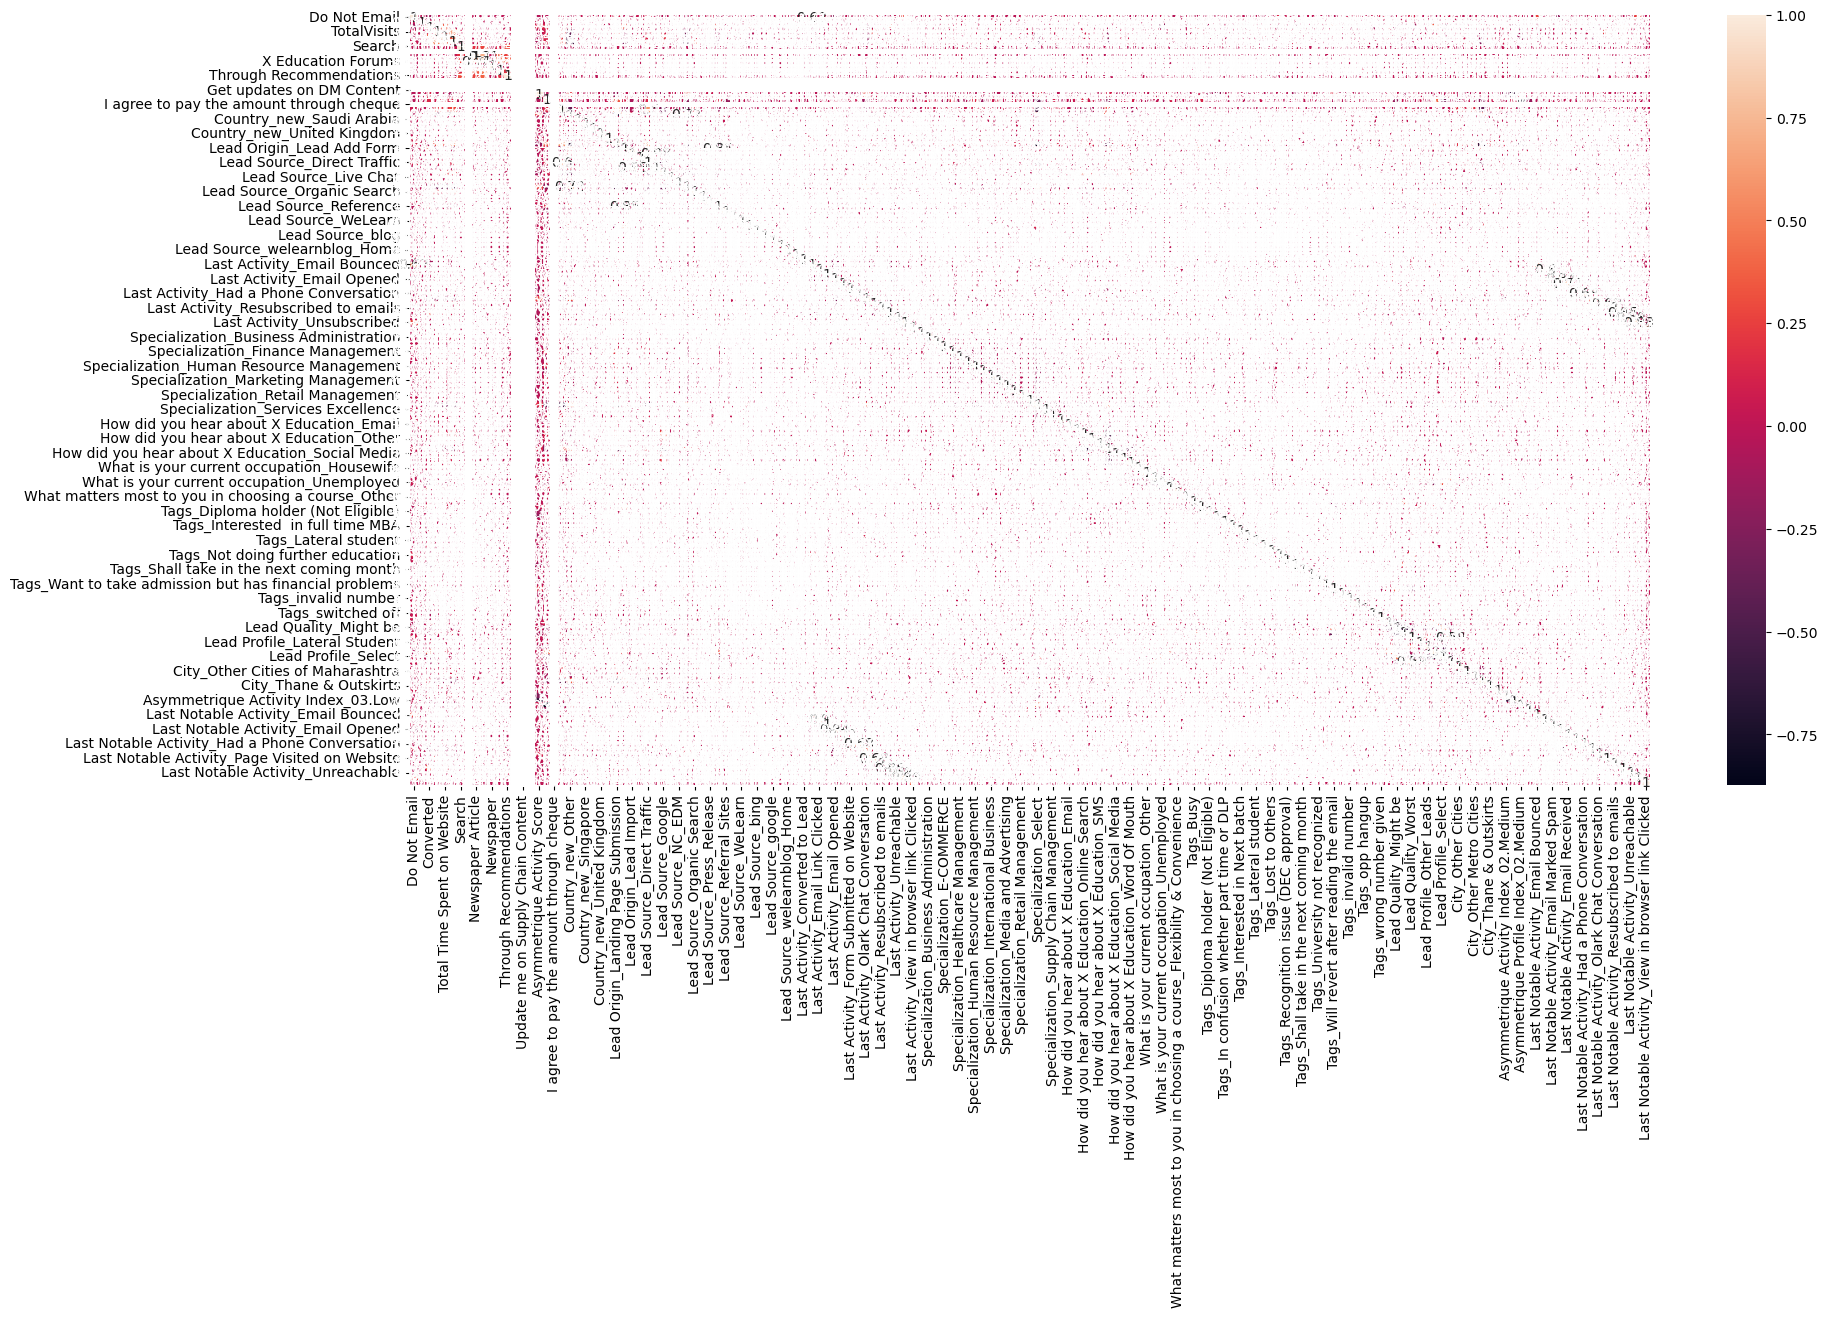

In [334]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

#### Dropping highly correlated dummy variables

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [388]:
import statsmodels.api as sm

In [389]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                          148
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 15 Apr 2024   Deviance:                       61525.
Time:                        02:59:52   Pearson chi2:                 3.01e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    5.024e+15   5.77e+07   8.71e+07      0.000    5.02e+15    5.02e+15
Do Not Email                                                            -2.797e+14    4.5e+06  -6.22e+07      0.000    -2.8e+14    -2.8e+14
Do Not Call                                                              7.591e+15   4.79e+07   1.58e+08      0.000    7.59e+15    7.59e+15
TotalVisits                                                              6.042e+13   1.38e+06   4.39e+07      0.000    6.04e+13    6.04e+13
Total Time Spent on Website                                              2.756e+14   1.01e+06   2.74e+08      0.000    2.76e+14    2.76e+14
Page Views Per Visit                                                    -5.394e+13   1.46e+06   -3.7e+07      0.000   -5.39e+13   -5.39e+13
Search                                                                  -2.448e+14   2.22e+07   -1.1e+07      0.000   -2.45e+14   -2.45e+14
Magazine                                                                  -40.6094   1.56e-06   -2.6e+07      0.000     -40.609     -40.609
Newspaper Article                                                        2.961e+15   6.75e+07   4.39e+07      0.000    2.96e+15    2.96e+15
X Education Forums                                                      -7.304e+15   1.12e+08  -6.51e+07      0.000    -7.3e+15    -7.3e+15
Newspaper                                                                -4.08e+15   6.75e+07  -6.05e+07      0.000   -4.08e+15   -4.08e+15
Digital Advertisement                                                   -4.128e+15   4.83e+07  -8.55e+07      0.000   -4.13e+15   -4.13e+15
Through Recommendations                                                  2.342e+14   2.87e+07   8.17e+06      0.000    2.34e+14    2.34e+14
Receive More Updates About Our Courses                                     77.5912   8.98e-07   8.64e+07      0.000      77.591      77.591
Update me on Supply Chain Content                                          54.9613   5.18e-07   1.06e+08      0.000      54.961      54.961
Get updates on DM Content                                                 -67.7923   1.09e-06  -6.23e+07      0.000     -67.792     -67.792
Asymmetrique Activity Score                                               3.98e+14   1.77e+06   2.25e+08      0.000    3.98e+14    3.98e+14
Asymmetrique Profile Score                                              -7.445e+12   2.48e+06     -3e+06      0.000   -7.44e+12   -7.44e+12
I agree to pay the amount through cheque                                  -40.7102   7.67e-07   -5.3e+07      0.000     -40.710     -40.710
A f

### Step 8: Feature Selection Using RFE

In [390]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [391]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 25)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [392]:
rfe.support_

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False, False, False,  True, False,  True,  True,
        True, False, False, False,  True, False, False, False, False,
        True, False, False, False, False,  True,  True, False,  True,
        True,  True,

In [393]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 15),
 ('Do Not Call', False, 76),
 ('TotalVisits', False, 67),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 66),
 ('Search', False, 73),
 ('Magazine', False, 128),
 ('Newspaper Article', False, 120),
 ('X Education Forums', False, 72),
 ('Newspaper', False, 70),
 ('Digital Advertisement', False, 22),
 ('Through Recommendations', False, 91),
 ('Receive More Updates About Our Courses', False, 129),
 ('Update me on Supply Chain Content', False, 130),
 ('Get updates on DM Content', False, 131),
 ('Asymmetrique Activity Score', False, 3),
 ('Asymmetrique Profile Score', False, 104),
 ('I agree to pay the amount through cheque', False, 133),
 ('A free copy of Mastering The Interview', False, 38),
 ('Country_new_Other', False, 96),
 ('Country_new_Saudi Arabia', True, 1),
 ('Country_new_Singapore', False, 71),
 ('Country_new_United Arab Emirates', False, 56),
 ('Country_new_United Kingdom', False, 108),
 ('Country_new_United States', Fals

In [394]:
col = X_train.columns[rfe.support_]

In [395]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement',
       ...
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=133)

##### Assessing the model with StatsModels

In [396]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1331.2
Date:                Mon, 15 Apr 2024   Deviance:                       2662.4
Time:                        03:01:11   Pearson chi2:                 2.34e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6006
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0909      0.323     -3.375      0.001      -1.724      -0.457
Total Time Spent on Website                              1.0055      0.053     19.140      0.000       0.903       1.108
Country_new_Saudi Arabia                                -2.1156      1.332     -1.588      0.112      -4.727       0.496
Lead Source_Welingak Website                             3.2700      0.764      4.279      0.000       1.772       4.768
Last Activity_Email Bounced                             -1.9264      0.368     -5.231      0.000      -2.648      -1.205
Last Activity_Olark Chat Conversation                   -1.1740      0.212     -5.529      0.000      -1.590      -0.758
What is your current occupation_Working Professional     2.0906      0.290      7.199      0.000       1.521       2.660
Tags_Busy                                                2.7804      0.402      6.922      0.000       1.993       3.568
Tags_Closed by Horizzon                                  8.9825      1.071      8.386      0.000       6.883      11.082
Tags_Interested  in full time MBA                       -1.8135      0.953     -1.903      0.057      -3.681       0.054
Tags_Interested in other courses                        -1.0317      0.462     -2.236      0.025      -1.936      -0.127
Tags_Lateral student                                    26.8306   6.87e+04      0.000      1.000   -1.35e+05    1.35e+05
Tags_Lost to EINS                                        9.8503      0.818     12.040      0.000       8.247      11.454
Tags_Ringing                                            -1.4044      0.384     -3.661      0.000      -2.156      -0.653
Tags_Will revert after reading the email                 4.4315      0.315     14.082      0.000       3.815       5.048
Tags_switched off                                       -1.7627      0.639     -2.760      0.006      -3.014      -0.511
Tags_wrong number given                                -22.6047   1.82e+04     -0.001      0.999   -3.57e+04    3.56e+04
Lead Quality_Might be                                   -2.6812      0.249    -10.788      0.000      -3.168      -2.194
Lead Quality_Not Sure                                   -1.6645      0.312     -5.339      0.000      -2.276      -1.053
Lead Quality_Worst                                      -3.7692      0.728     -5.180      0.000      -5.195      -2.343
Lead Profile_Select                                     -2.2176      0.180    -12.326      0.000      -2.570      -1.865
Lead Profile_Student of SomeSchool                      -2.3415      1.031     -2.271      0.023      -4.362      -0.321
City_Select                                              2

In [397]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.007389
6795    0.174718
3516    0.003262
8105    0.033072
3934    0.479714
4844    0.999304
3297    0.000815
8071    0.999940
987     0.279066
7423    0.999528
dtype: float64

In [398]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([7.38912978e-03, 1.74718397e-01, 3.26220014e-03, 3.30724494e-02,
       4.79713666e-01, 9.99303777e-01, 8.15183106e-04, 9.99939891e-01,
       2.79066043e-01, 9.99528030e-01])

#### Checking VIFs

In [399]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [400]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Lead Quality_Might be,9.06
19,Lead Profile_Select,6.87
13,Tags_Will revert after reading the email,4.54
17,Lead Quality_Not Sure,2.50
12,Tags_Ringing,2.04
18,Lead Quality_Worst,1.89
20,Lead Profile_Student of SomeSchool,1.68
24,Last Notable Activity_SMS Sent,1.60
21,City_Select,1.51
9,Tags_Interested in other courses,1.32


## There are a few variables with high p value and high VIF. It's best to drop these variables.Lets start by dropping 'Tags_Lateral student'

In [402]:
col = col.drop('Tags_Lateral student', 1)
col

Index(['Total Time Spent on Website', 'Country_new_Saudi Arabia',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Might be',
       'Lead Quality_Not Sure', 'Lead Quality_Worst', 'Lead Profile_Select',
       'Lead Profile_Student of SomeSchool', 'City_Select',
       'Asymmetrique Activity Index_03.Low',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [403]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1336.9
Date:                Mon, 15 Apr 2024   Deviance:                       2673.8
Time:                        03:02:44   Pearson chi2:                 2.32e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5999
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9349      0.310     -3.018      0.003      -1.542      -0.328
Total Time Spent on Website                              1.0039      0.052     19.138      0.000       0.901       1.107
Country_new_Saudi Arabia                                -2.1314      1.321     -1.613      0.107      -4.721       0.458
Lead Source_Welingak Website                             3.2576      0.765      4.260      0.000       1.759       4.756
Last Activity_Email Bounced                             -1.9363      0.368     -5.261      0.000      -2.658      -1.215
Last Activity_Olark Chat Conversation                   -1.1906      0.212     -5.605      0.000      -1.607      -0.774
What is your current occupation_Working Professional     2.0874      0.290      7.208      0.000       1.520       2.655
Tags_Busy                                                2.6241      0.390      6.722      0.000       1.859       3.389
Tags_Closed by Horizzon                                  8.8059      1.067      8.256      0.000       6.715      10.896
Tags_Interested  in full time MBA                       -1.9723      0.950     -2.075      0.038      -3.835      -0.110
Tags_Interested in other courses                        -1.1883      0.453     -2.622      0.009      -2.077      -0.300
Tags_Lost to EINS                                        9.7009      0.814     11.915      0.000       8.105      11.297
Tags_Ringing                                            -1.5678      0.372     -4.214      0.000      -2.297      -0.839
Tags_Will revert after reading the email                 4.2500      0.300     14.190      0.000       3.663       4.837
Tags_switched off                                       -1.9244      0.632     -3.044      0.002      -3.163      -0.685
Tags_wrong number given                                -22.7754   1.82e+04     -0.001      0.999   -3.56e+04    3.56e+04
Lead Quality_Might be                                   -2.6731      0.246    -10.868      0.000      -3.155      -2.191
Lead Quality_Not Sure                                   -1.6902      0.308     -5.482      0.000      -2.294      -1.086
Lead Quality_Worst                                      -3.8965      0.721     -5.401      0.000      -5.311      -2.483
Lead Profile_Select                                     -2.1994      0.179    -12.306      0.000      -2.550      -1.849
Lead Profile_Student of SomeSchool                      -2.3244      1.017     -2.284      0.022      -4.319      -0.330
City_Select                                              2.3859      0.136     17.482      0.000       2.118       2.653
Asymmetrique Activity Index_03.Low                      -2

##### Let's check the VIFs again

In [404]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Lead Quality_Might be,9.06
18,Lead Profile_Select,6.87
12,Tags_Will revert after reading the email,4.53
16,Lead Quality_Not Sure,2.50
11,Tags_Ringing,2.04
17,Lead Quality_Worst,1.89
19,Lead Profile_Student of SomeSchool,1.68
23,Last Notable Activity_SMS Sent,1.60
20,City_Select,1.51
9,Tags_Interested in other courses,1.32


In [405]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('Tags_wrong number given')
col

Index(['Total Time Spent on Website', 'Country_new_Saudi Arabia',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Lead Profile_Select', 'Lead Profile_Student of SomeSchool',
       'City_Select', 'Asymmetrique Activity Index_03.Low',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [406]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1341.0
Date:                Mon, 15 Apr 2024   Deviance:                       2682.0
Time:                        03:03:42   Pearson chi2:                 2.30e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5994
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1158      0.310     -3.594      0.000      -1.724      -0.507
Total Time Spent on Website                              0.9979      0.052     19.105      0.000       0.895       1.100
Country_new_Saudi Arabia                                -2.0983      1.330     -1.577      0.115      -4.705       0.509
Lead Source_Welingak Website                             3.2532      0.764      4.256      0.000       1.755       4.751
Last Activity_Email Bounced                             -1.9269      0.368     -5.241      0.000      -2.647      -1.206
Last Activity_Olark Chat Conversation                   -1.1808      0.212     -5.569      0.000      -1.596      -0.765
What is your current occupation_Working Professional     2.0903      0.290      7.208      0.000       1.522       2.659
Tags_Busy                                                2.8258      0.387      7.296      0.000       2.067       3.585
Tags_Closed by Horizzon                                  8.9792      1.067      8.414      0.000       6.887      11.071
Tags_Interested  in full time MBA                       -1.7928      0.950     -1.887      0.059      -3.655       0.069
Tags_Interested in other courses                        -1.0040      0.452     -2.223      0.026      -1.889      -0.119
Tags_Lost to EINS                                        9.8520      0.814     12.103      0.000       8.257      11.447
Tags_Ringing                                            -1.3649      0.369     -3.700      0.000      -2.088      -0.642
Tags_Will revert after reading the email                 4.4319      0.301     14.728      0.000       3.842       5.022
Tags_switched off                                       -1.7203      0.630     -2.732      0.006      -2.955      -0.486
Lead Quality_Might be                                   -2.6651      0.245    -10.866      0.000      -3.146      -2.184
Lead Quality_Not Sure                                   -1.7024      0.306     -5.561      0.000      -2.302      -1.102
Lead Quality_Worst                                      -3.7637      0.724     -5.201      0.000      -5.182      -2.345
Lead Profile_Select                                     -2.2059      0.178    -12.378      0.000      -2.555      -1.857
Lead Profile_Student of SomeSchool                      -2.3204      1.031     -2.251      0.024      -4.340      -0.300
City_Select                                              2.3813      0.136     17.496      0.000       2.115       2.648
Asymmetrique Activity Index_03.Low                      -2.0370      0.379     -5.375      0.000      -2.780      -1.294
Last Notable Activity_Had a Phone Conversation           2

##### Let's now check the VIFs again

In [407]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Lead Quality_Might be,9.01
17,Lead Profile_Select,6.86
12,Tags_Will revert after reading the email,4.46
15,Lead Quality_Not Sure,2.46
11,Tags_Ringing,2.01
16,Lead Quality_Worst,1.88
18,Lead Profile_Student of SomeSchool,1.68
22,Last Notable Activity_SMS Sent,1.60
19,City_Select,1.51
9,Tags_Interested in other courses,1.31


In [408]:
col = col.drop('Country_new_Saudi Arabia', 1)
col

Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Lead Profile_Select', 'Lead Profile_Student of SomeSchool',
       'City_Select', 'Asymmetrique Activity Index_03.Low',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [409]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1342.6
Date:                Mon, 15 Apr 2024   Deviance:                       2685.1
Time:                        03:04:09   Pearson chi2:                 2.30e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5992
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1447      0.310     -3.688      0.000      -1.753      -0.536
Total Time Spent on Website                              0.9956      0.052     19.098      0.000       0.893       1.098
Lead Source_Welingak Website                             3.2517      0.764      4.255      0.000       1.754       4.750
Last Activity_Email Bounced                             -1.9224      0.368     -5.231      0.000      -2.643      -1.202
Last Activity_Olark Chat Conversation                   -1.1778      0.212     -5.557      0.000      -1.593      -0.762
What is your current occupation_Working Professional     2.0920      0.290      7.211      0.000       1.523       2.661
Tags_Busy                                                2.8336      0.385      7.351      0.000       2.078       3.589
Tags_Closed by Horizzon                                  9.0014      1.067      8.434      0.000       6.909      11.093
Tags_Interested  in full time MBA                       -1.7686      0.950     -1.862      0.063      -3.630       0.093
Tags_Interested in other courses                        -0.9811      0.451     -2.174      0.030      -1.866      -0.097
Tags_Lost to EINS                                        9.8703      0.814     12.127      0.000       8.275      11.466
Tags_Ringing                                            -1.3420      0.368     -3.644      0.000      -2.064      -0.620
Tags_Will revert after reading the email                 4.4517      0.301     14.783      0.000       3.861       5.042
Tags_switched off                                       -1.6987      0.629     -2.700      0.007      -2.932      -0.465
Lead Quality_Might be                                   -2.6589      0.246    -10.828      0.000      -3.140      -2.178
Lead Quality_Not Sure                                   -1.6962      0.305     -5.554      0.000      -2.295      -1.098
Lead Quality_Worst                                      -3.7425      0.724     -5.170      0.000      -5.161      -2.324
Lead Profile_Select                                     -2.2071      0.178    -12.386      0.000      -2.556      -1.858
Lead Profile_Student of SomeSchool                      -2.3197      1.032     -2.248      0.025      -4.342      -0.297
City_Select                                              2.3856      0.136     17.530      0.000       2.119       2.652
Asymmetrique Activity Index_03.Low                      -2.0311      0.379     -5.360      0.000      -2.774      -1.288
Last Notable Activity_Had a Phone Conversation           2.6855      1.220      2.201      0.028       0.294       5.077
Last Notable Activity_SMS Sent                           2

In [410]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Lead Quality_Might be,9.01
16,Lead Profile_Select,6.86
11,Tags_Will revert after reading the email,4.46
14,Lead Quality_Not Sure,2.46
10,Tags_Ringing,2.01
15,Lead Quality_Worst,1.88
17,Lead Profile_Student of SomeSchool,1.68
21,Last Notable Activity_SMS Sent,1.60
18,City_Select,1.51
8,Tags_Interested in other courses,1.31


In [411]:
col

Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Lead Profile_Select', 'Lead Profile_Student of SomeSchool',
       'City_Select', 'Asymmetrique Activity Index_03.Low',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [412]:
col = col.drop('Tags_Interested  in full time MBA', 1)
col

Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Lead Profile_Select', 'Lead Profile_Student of SomeSchool',
       'City_Select', 'Asymmetrique Activity Index_03.Low',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [413]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1344.7
Date:                Mon, 15 Apr 2024   Deviance:                       2689.5
Time:                        03:04:53   Pearson chi2:                 2.28e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5989
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3484      0.301     -4.478      0.000      -1.939      -0.758
Total Time Spent on Website                              0.9928      0.052     19.078      0.000       0.891       1.095
Lead Source_Welingak Website                             3.2464      0.764      4.250      0.000       1.749       4.744
Last Activity_Email Bounced                             -1.9102      0.367     -5.204      0.000      -2.630      -1.191
Last Activity_Olark Chat Conversation                   -1.1746      0.211     -5.555      0.000      -1.589      -0.760
What is your current occupation_Working Professional     2.0084      0.282      7.126      0.000       1.456       2.561
Tags_Busy                                                3.0057      0.382      7.862      0.000       2.256       3.755
Tags_Closed by Horizzon                                  9.1897      1.065      8.625      0.000       7.101      11.278
Tags_Interested in other courses                        -0.7756      0.444     -1.747      0.081      -1.646       0.095
Tags_Lost to EINS                                       10.0363      0.812     12.361      0.000       8.445      11.628
Tags_Ringing                                            -1.1641      0.364     -3.197      0.001      -1.878      -0.451
Tags_Will revert after reading the email                 4.6416      0.294     15.773      0.000       4.065       5.218
Tags_switched off                                       -1.5255      0.627     -2.433      0.015      -2.755      -0.296
Lead Quality_Might be                                   -2.6552      0.245    -10.851      0.000      -3.135      -2.176
Lead Quality_Not Sure                                   -1.6733      0.305     -5.479      0.000      -2.272      -1.075
Lead Quality_Worst                                      -3.6691      0.720     -5.098      0.000      -5.080      -2.258
Lead Profile_Select                                     -2.1958      0.178    -12.365      0.000      -2.544      -1.848
Lead Profile_Student of SomeSchool                      -2.2723      1.036     -2.194      0.028      -4.302      -0.242
City_Select                                              2.3826      0.136     17.508      0.000       2.116       2.649
Asymmetrique Activity Index_03.Low                      -2.0106      0.380     -5.290      0.000      -2.756      -1.266
Last Notable Activity_Had a Phone Conversation           2.7413      1.216      2.254      0.024       0.358       5.125
Last Notable Activity_SMS Sent                           2.6462      0.128     20.613      0.000       2.395       2.898
==========================================================

In [414]:
col = col.drop('Tags_Interested in other courses', 1)
col

Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Lead Profile_Select', 'Lead Profile_Student of SomeSchool',
       'City_Select', 'Asymmetrique Activity Index_03.Low',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [415]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1346.3
Date:                Mon, 15 Apr 2024   Deviance:                       2692.7
Time:                        03:05:08   Pearson chi2:                 2.24e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5987
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6362      0.260     -6.287      0.000      -2.146      -1.126
Total Time Spent on Website                              0.9944      0.052     19.110      0.000       0.892       1.096
Lead Source_Welingak Website                             3.2490      0.764      4.254      0.000       1.752       4.746
Last Activity_Email Bounced                             -1.9020      0.366     -5.192      0.000      -2.620      -1.184
Last Activity_Olark Chat Conversation                   -1.1680      0.211     -5.537      0.000      -1.581      -0.755
What is your current occupation_Working Professional     1.9580      0.276      7.100      0.000       1.418       2.499
Tags_Busy                                                3.2997      0.354      9.321      0.000       2.606       3.994
Tags_Closed by Horizzon                                  9.4684      1.056      8.962      0.000       7.398      11.539
Tags_Lost to EINS                                       10.2926      0.802     12.835      0.000       8.721      11.864
Tags_Ringing                                            -0.8793      0.336     -2.619      0.009      -1.537      -0.221
Tags_Will revert after reading the email                 4.9202      0.260     18.938      0.000       4.411       5.429
Tags_switched off                                       -1.2395      0.611     -2.029      0.043      -2.437      -0.042
Lead Quality_Might be                                   -2.6289      0.242    -10.851      0.000      -3.104      -2.154
Lead Quality_Not Sure                                   -1.6749      0.304     -5.517      0.000      -2.270      -1.080
Lead Quality_Worst                                      -3.5882      0.715     -5.018      0.000      -4.990      -2.187
Lead Profile_Select                                     -2.2132      0.177    -12.488      0.000      -2.561      -1.866
Lead Profile_Student of SomeSchool                      -2.1870      1.056     -2.072      0.038      -4.256      -0.118
City_Select                                              2.3759      0.136     17.475      0.000       2.109       2.642
Asymmetrique Activity Index_03.Low                      -1.9939      0.381     -5.236      0.000      -2.740      -1.248
Last Notable Activity_Had a Phone Conversation           2.8290      1.214      2.331      0.020       0.450       5.207
Last Notable Activity_SMS Sent                           2.6564      0.129     20.661      0.000       2.404       2.908
========================================================================================================================
"""

In [416]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Lead Quality_Might be,8.41
14,Lead Profile_Select,6.83
9,Tags_Will revert after reading the email,3.90
12,Lead Quality_Not Sure,2.29
8,Tags_Ringing,1.82
13,Lead Quality_Worst,1.77
15,Lead Profile_Student of SomeSchool,1.63
19,Last Notable Activity_SMS Sent,1.60
16,City_Select,1.49
4,What is your current occupation_Working Profes...,1.26


In [417]:
col = col.drop('Lead Quality_Might be', 1)
col

Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst', 'Lead Profile_Select',
       'Lead Profile_Student of SomeSchool', 'City_Select',
       'Asymmetrique Activity Index_03.Low',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [418]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1418.7
Date:                Mon, 15 Apr 2024   Deviance:                       2837.5
Time:                        03:05:22   Pearson chi2:                 2.44e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5896
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.8907      0.239    -12.082      0.000      -3.360      -2.422
Total Time Spent on Website                              0.9941      0.051     19.451      0.000       0.894       1.094
Lead Source_Welingak Website                             3.1882      0.758      4.208      0.000       1.703       4.673
Last Activity_Email Bounced                             -1.7578      0.334     -5.270      0.000      -2.412      -1.104
Last Activity_Olark Chat Conversation                   -1.2671      0.206     -6.144      0.000      -1.671      -0.863
What is your current occupation_Working Professional     2.1526      0.283      7.610      0.000       1.598       2.707
Tags_Busy                                                3.3785      0.350      9.652      0.000       2.692       4.065
Tags_Closed by Horizzon                                  9.8713      1.044      9.455      0.000       7.825      11.917
Tags_Lost to EINS                                       10.1941      0.801     12.719      0.000       8.623      11.765
Tags_Ringing                                            -1.2148      0.329     -3.692      0.000      -1.860      -0.570
Tags_Will revert after reading the email                 4.8115      0.253     18.983      0.000       4.315       5.308
Tags_switched off                                       -1.5908      0.607     -2.619      0.009      -2.781      -0.400
Lead Quality_Not Sure                                    0.4359      0.230      1.898      0.058      -0.014       0.886
Lead Quality_Worst                                      -1.9465      0.654     -2.974      0.003      -3.229      -0.664
Lead Profile_Select                                     -3.3426      0.152    -21.973      0.000      -3.641      -3.044
Lead Profile_Student of SomeSchool                      -2.8730      1.067     -2.691      0.007      -4.965      -0.781
City_Select                                              2.2728      0.134     16.907      0.000       2.009       2.536
Asymmetrique Activity Index_03.Low                      -1.8709      0.362     -5.174      0.000      -2.580      -1.162
Last Notable Activity_Had a Phone Conversation           3.2217      1.265      2.547      0.011       0.743       5.700
Last Notable Activity_SMS Sent                           2.6001      0.128     20.382      0.000       2.350       2.850
========================================================================================================================
"""

In [419]:
col = col.drop('Lead Quality_Not Sure', 1)
col

Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Worst', 'Lead Profile_Select',
       'Lead Profile_Student of SomeSchool', 'City_Select',
       'Asymmetrique Activity Index_03.Low',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [420]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1420.6
Date:                Mon, 15 Apr 2024   Deviance:                       2841.1
Time:                        03:05:34   Pearson chi2:                 2.47e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5894
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7501      0.225    -12.248      0.000      -3.190      -2.310
Total Time Spent on Website                              0.9997      0.051     19.583      0.000       0.900       1.100
Lead Source_Welingak Website                             3.1873      0.758      4.206      0.000       1.702       4.673
Last Activity_Email Bounced                             -1.7570      0.334     -5.264      0.000      -2.411      -1.103
Last Activity_Olark Chat Conversation                   -1.2649      0.206     -6.131      0.000      -1.669      -0.861
What is your current occupation_Working Professional     2.1348      0.282      7.572      0.000       1.582       2.687
Tags_Busy                                                3.5636      0.335     10.622      0.000       2.906       4.221
Tags_Closed by Horizzon                                  9.7570      1.042      9.367      0.000       7.715      11.799
Tags_Lost to EINS                                       10.1190      0.798     12.686      0.000       8.556      11.682
Tags_Ringing                                            -1.1341      0.323     -3.506      0.000      -1.768      -0.500
Tags_Will revert after reading the email                 4.6915      0.243     19.341      0.000       4.216       5.167
Tags_switched off                                       -1.4586      0.607     -2.404      0.016      -2.648      -0.270
Lead Quality_Worst                                      -2.0925      0.648     -3.229      0.001      -3.363      -0.822
Lead Profile_Select                                     -3.3623      0.152    -22.121      0.000      -3.660      -3.064
Lead Profile_Student of SomeSchool                      -2.7611      1.066     -2.590      0.010      -4.851      -0.671
City_Select                                              2.2725      0.134     16.941      0.000       2.010       2.535
Asymmetrique Activity Index_03.Low                      -1.8632      0.361     -5.168      0.000      -2.570      -1.157
Last Notable Activity_Had a Phone Conversation           3.1677      1.252      2.530      0.011       0.713       5.622
Last Notable Activity_SMS Sent                           2.6246      0.127     20.653      0.000       2.375       2.874
========================================================================================================================
"""

In [421]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Lead Profile_Select,3.64
9,Tags_Will revert after reading the email,3.14
11,Lead Quality_Worst,1.67
13,Lead Profile_Student of SomeSchool,1.61
17,Last Notable Activity_SMS Sent,1.57
8,Tags_Ringing,1.54
14,City_Select,1.43
4,What is your current occupation_Working Profes...,1.25
3,Last Activity_Olark Chat Conversation,1.24
6,Tags_Closed by Horizzon,1.12


## Final Equation

## Lead_Score = [-2.7501 + 0.9997* ('Total Time Spent on Website') + 3.1882 * ('Lead Source_Welingak Website') + (-1.7570) * ('Last Activity_Email Bounced') + (-1.2649) * ('Last Activity_Olark Chat Conversation') + 2.1348 * ('What is your current occupation_Working Professional') + 3.5636 * ('Tags_Busy') + 9.7570*('Tags_Closed by Horizzon') + 10.1190* ('Tags_Lost to EINS') + (-1.1341)*('Tags_Ringing') + (4.6915)*('Tags_Will revert after reading the email') + (-1.4586)*('Tags_switched off') + (-2.0925)*('Lead Quality_Worst') -3.3623*('Lead Profile_Select')+ (-2.7611)*('Lead Profile_Student of SomeSchool') +(2.2725)* ('City_Select')+ (-1.8632)*('Asymmetrique Activity Index_03.Low')+ 3.1677*('Last Notable Activity_Had a Phone Conversation') + (2.6246)*('Last Notable Activity_SMS Sent')]*100

## "Tags_Lost to EINS", "Tags_Closed by Horizzon", "Tags_Will revert after reading the email" these have the largest positive coefficients, indicating they are the biggest contributors

In [422]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [423]:
y_train_pred[:10]

array([2.84610505e-03, 1.95428923e-01, 3.45295162e-03, 3.70725610e-02,
       4.91657161e-01, 9.99808998e-01, 3.43493710e-04, 9.99860920e-01,
       3.06791792e-01, 9.99851141e-01])

In [424]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head(10)

,Converted,Converted_Prob,Lead ID
0,0,0.002846,1871
1,0,0.195429,6795
2,0,0.003453,3516
3,0,0.037073,8105
4,0,0.491657,3934
5,1,0.999809,4844
6,0,0.000343,3297
7,1,0.999861,8071
8,0,0.306792,987
9,1,0.999851,7423


## Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [425]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(20)

,Converted,Converted_Prob,Lead ID,predicted
0,0,0.002846,1871,0
1,0,0.195429,6795,0
2,0,0.003453,3516,0
3,0,0.037073,8105,0
4,0,0.491657,3934,0
5,1,0.999809,4844,1
6,0,0.000343,3297,0
7,1,0.999861,8071,1
8,0,0.306792,987,0
9,1,0.999851,7423,1


In [426]:
from sklearn import metrics

In [427]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3780  222]
 [ 325 2141]]


In [428]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9154298082869512


## Accuracy of the model is 91%

All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

## Metrics beyond simply accuracy

In [429]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [430]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8682076236820763

In [431]:
# Let us calculate specificity
TN / float(TN+FP)

0.9445277361319341

In [432]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.05547226386806597


In [433]:
# positive predictive value 
print (TP / float(TP+FP))

0.9060516292848074


In [434]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9208282582216809


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [435]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [436]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

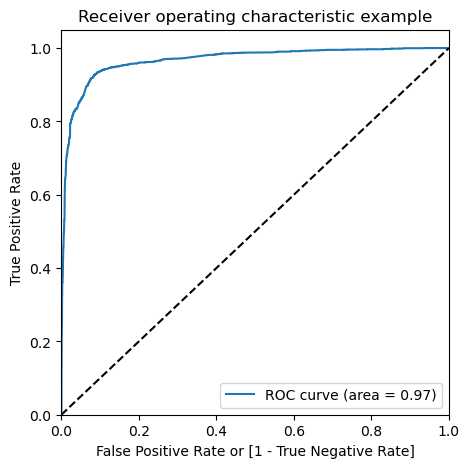

In [437]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [438]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.002846,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.195429,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.003453,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.037073,8105,0,1,0,0,0,0,0,0,0,0,0
4,0,0.491657,3934,0,1,1,1,1,1,0,0,0,0,0


In [439]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.808287  0.971208  0.707896
0.2   0.2  0.899351  0.947283  0.869815
0.3   0.3  0.915275  0.934307  0.903548
0.4   0.4  0.920223  0.918491  0.921289
0.5   0.5  0.915430  0.868208  0.944528
0.6   0.6  0.913265  0.831711  0.963518
0.7   0.7  0.908782  0.800892  0.975262
0.8   0.8  0.887137  0.732360  0.982509
0.9   0.9  0.861472  0.654501  0.989005


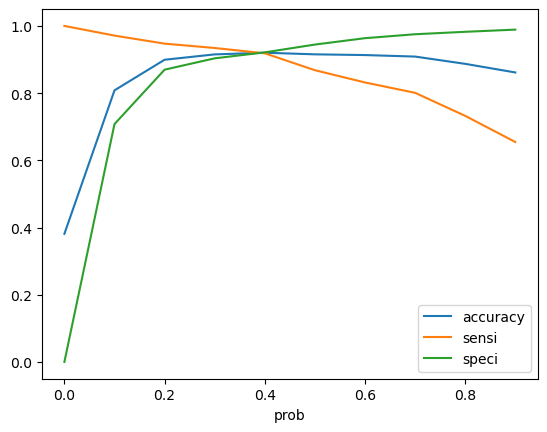

In [440]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [441]:
#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [442]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.002846,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.195429,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.003453,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.037073,8105,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.491657,3934,0,1,1,1,1,1,0,0,0,0,0,1


In [443]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9202226345083488

## Model accuracy on train set after taking cut off value as 0.4 instead of 0.5 increases to 92.02%

In [444]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3687,  315],
       [ 201, 2265]], dtype=int64)

In [445]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [446]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9184914841849149

In [447]:
# Let us calculate specificity
TN / float(TN+FP)

0.9212893553223388

In [448]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.07871064467766117


In [449]:
# Positive predictive value 
print (TP / float(TP+FP))

0.877906976744186


In [450]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9483024691358025


## Precision and Recall

In [97]:
#Looking at the confusion matrix again

In [451]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3780,  222],
       [ 325, 2141]], dtype=int64)

##### Precision
TP / TP + FP

In [452]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9060516292848074

##### Recall
TP / TP + FN

In [453]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8682076236820763

Using sklearn utilities for the same

In [454]:
from sklearn.metrics import precision_score, recall_score

In [455]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9060516292848074

In [456]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8682076236820763

### Step 11: Making predictions on the test set

In [457]:
X_test.shape

(2772, 158)

In [458]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4269,0,0,8.0,1011,8.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2376,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7766,0,0,5.0,59,5.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9199,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4359,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [459]:
from sklearn.preprocessing import StandardScaler

In [460]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4269,0,0,8.0,1011,8.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2376,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7766,0,0,5.0,59,5.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9199,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4359,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [461]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']])

In [462]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Worst,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Select,Asymmetrique Activity Index_03.Low,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent
4269,0.964504,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
2376,-0.885371,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1
7766,-0.777416,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
9199,-0.885371,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4359,-0.885371,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [463]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [464]:
y_test_pred = res.predict(X_test_sm)

In [465]:
y_test_pred[:10]

4269    0.897330
2376    0.930292
7766    0.484204
9199    0.067387
4359    0.741997
9186    0.991840
1631    0.948303
8963    0.978524
8007    0.157536
5324    0.648242
dtype: float64

In [466]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [467]:
# Let's see the head
y_pred_1.head()

,0
4269,0.897330
2376,0.930292
7766,0.484204
9199,0.067387
4359,0.741997


In [468]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [469]:
# Putting CustID to index
y_test_df['Lead ID'] = y_test_df.index

In [470]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [471]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [472]:
y_pred_final.head()

,Converted,Lead ID,0
0,1,4269,0.897330
1,1,2376,0.930292
2,1,7766,0.484204
3,0,9199,0.067387
4,1,4359,0.741997


In [473]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [474]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Lead ID,Converted_Prob
0,1,4269,0.897330
1,1,2376,0.930292
2,1,7766,0.484204
3,0,9199,0.067387
4,1,4359,0.741997


In [475]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [476]:
y_pred_final.head()

,Converted,Lead ID,Converted_Prob,final_predicted
0,1,4269,0.897330,1
1,1,2376,0.930292,1
2,1,7766,0.484204,1
3,0,9199,0.067387,0
4,1,4359,0.741997,1


In [477]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.915945165945166

## Model accuracy on test set is 91.6%

In [478]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1525,  152],
       [  81, 1014]], dtype=int64)

In [479]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [480]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9260273972602739

In [481]:
# Let us calculate specificity
TN / float(TN+FP)

0.9093619558735838